In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# load the data
df = pd.read_csv('5yr.csv')

# preprocess the data
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# create training dataset
train_data = scaled_data[0:training_data_len, :]

# split the data into X_train and y_train datasets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# create the neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# predict the next day's close value
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
next_day_prediction = model.predict(last_60_days)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
next_day_date = pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=1)
next_day_close = next_day_prediction[0][0]
print('The predicted close value for', next_day_date.date(), 'is:', next_day_close)

# predict future close values
num_of_days = int(input('Enter the number of days to predict future close values: '))
future_predictions = []
future_dates = []

for i in range(num_of_days):
    last_60_days = scaled_data[-60:]
    last_60_days = np.reshape(last_60_days, (1, 60, 1))
    next_day_prediction = model.predict(last_60_days)
    future_predictions.append(next_day_prediction[0][0])
    future_dates.append(pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=i+1))
    scaled_data = np.append(scaled_data, next_day_prediction, axis=0)
    scaled_data = np.delete(scaled_data, 0, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# print future close values
print("Future Close Values:")
for date, close in zip(future_dates, future_predictions):
    print(date.date(), ":", close[0])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load the data
df = pd.read_csv('5yr.csv')

# Preprocess the data
data = df.filter(['Open'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train datasets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next day's open value
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
next_day_prediction = model.predict(last_60_days)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
next_day_date = pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=1)
next_day_open = next_day_prediction[0][0]
print('The predicted open value for', next_day_date.date(), 'is:', next_day_open)

# Predict future open values
num_of_days = int(input('Enter the number of days to predict future open values: '))
future_predictions = []
future_dates = []

for i in range(num_of_days):
    last_60_days = scaled_data[-60:]
    last_60_days = np.reshape(last_60_days, (1, 60, 1))
    next_day_prediction = model.predict(last_60_days)
    future_predictions.append(next_day_prediction[0][0])
    future_dates.append(pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=i+1))
    scaled_data = np.append(scaled_data, next_day_prediction, axis=0)
    scaled_data = np.delete(scaled_data, 0, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print future open values
print("Future Open Values:")
for date, open_val in zip(future_dates, future_predictions):
    print(date.date(), ":", open_val[0])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load the data
df = pd.read_csv('5yr.csv')

# Preprocess the data
data = df.filter(['High'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train datasets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next day's high value
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
next_day_prediction = model.predict(last_60_days)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
next_day_date = pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=1)
next_day_high = next_day_prediction[0][0]
print('The predicted high value for', next_day_date.date(), 'is:', next_day_high)

# Predict future high values
num_of_days = int(input('Enter the number of days to predict future high values: '))
future_predictions = []
future_dates = []

for i in range(num_of_days):
    last_60_days = scaled_data[-60:]
    last_60_days = np.reshape(last_60_days, (1, 60, 1))
    next_day_prediction = model.predict(last_60_days)
    future_predictions.append(next_day_prediction[0][0])
    future_dates.append(pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=i+1))
    scaled_data = np.append(scaled_data, next_day_prediction, axis=0)
    scaled_data = np.delete(scaled_data, 0, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print future high values
print("Future High Values:")
for date, high_val in zip(future_dates, future_predictions):
    print(date.date(), ":", high_val[0])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load the data
df = pd.read_csv('5yr.csv')

# Preprocess the data
data = df.filter(['Low'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train datasets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next day's low value
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
next_day_prediction = model.predict(last_60_days)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
next_day_date = pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=1)
next_day_low = next_day_prediction[0][0]
print('The predicted low value for', next_day_date.date(), 'is:', next_day_low)

# Predict future low values
num_of_days = int(input('Enter the number of days to predict future low values: '))
future_predictions = []
future_dates = []

for i in range(num_of_days):
    last_60_days = scaled_data[-60:]
    last_60_days = np.reshape(last_60_days, (1, 60, 1))
    next_day_prediction = model.predict(last_60_days)
    future_predictions.append(next_day_prediction[0][0])
    future_dates.append(pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=i+1))
    scaled_data = np.append(scaled_data, next_day_prediction, axis=0)
    scaled_data = np.delete(scaled_data, 0, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print future low values
print("Future Low Values:")
for date, low_val in zip(future_dates, future_predictions):
    print(date.date(), ":", low_val[0])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load the data
df = pd.read_csv('5yr.csv')

# Preprocess the data
data = df.filter(['Volume'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training dataset
train_data = scaled_data[0:training_data_len, :]

# Split the data into X_train and y_train datasets
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Predict the next day's volume value
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1, 60, 1))
next_day_prediction = model.predict(last_60_days)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
next_day_date = pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=1)
next_day_volume = next_day_prediction[0][0]
print('The predicted volume value for', next_day_date.date(), 'is:', next_day_volume)

# Predict future volume values
num_of_days = int(input('Enter the number of days to predict future volume values: '))
future_predictions = []
future_dates = []

for i in range(num_of_days):
    last_60_days = scaled_data[-60:]
    last_60_days = np.reshape(last_60_days, (1, 60, 1))
    next_day_prediction = model.predict(last_60_days)
    future_predictions.append(next_day_prediction[0][0])
    future_dates.append(pd.to_datetime(df['Date'].iloc[-1]) + pd.DateOffset(days=i+1))
    scaled_data = np.append(scaled_data, next_day_prediction, axis=0)
    scaled_data = np.delete(scaled_data, 0, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Print future volume values
print("Future Volume Values:")
for date, volume_val in zip(future_dates, future_predictions):
    print(date.date(), ":", volume_val[0])


In [ ]:
import tkinter as tk
import webbrowser
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a Tkinter window
window = tk.Tk()

# Function to handle button click event
def plot_candlestick():
    # Get the start and end dates from the input fields
    start_date = start_entry.get()
    end_date = end_entry.get()

    # Load the data
    df = pd.read_csv('predicted.csv')

    # Filter the data based on the start and end dates
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_data = df.loc[mask]

    # Create the Plotly figure
    fig = make_subplots(rows=1, cols=1)

    # Add the candlestick trace
    candlestick_trace = go.Candlestick(
        x=filtered_data['Date'],
        open=filtered_data['Open'],
        high=filtered_data['High'],
        low=filtered_data['Low'],
        close=filtered_data['Close'],
        increasing=dict(line=dict(color='green')),
        decreasing=dict(line=dict(color='red'))
    )
    fig.add_trace(candlestick_trace)

    # Update the layout
    fig.update_layout(
        title='Stock Candlestick Graph',
        xaxis_rangeslider_visible=False
    )

    # Save the HTML file
    fig.write_html('candlestick_graph.html')

    # Open the HTML file in the web browser
    webbrowser.open('candlestick_graph.html')

# Create input fields for start and end dates
start_label = tk.Label(window, text="Start Date (YYYY-MM-DD):")
start_label.pack()
start_entry = tk.Entry(window)
start_entry.pack()

end_label = tk.Label(window, text="End Date (YYYY-MM-DD):")
end_label.pack()
end_entry = tk.Entry(window)
end_entry.pack()

# Create a button to plot the candlestick graph
plot_button = tk.Button(window, text="Plot Candlestick", command=plot_candlestick)
plot_button.pack()

# Run the Tkinter event loop
window.mainloop()


In [ ]:
import tkinter as tk
import webbrowser
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a Tkinter window
window = tk.Tk()

# Function to handle button click event
def plot_candlestick():
    # Get the start and end dates from the input fields
    start_date = start_entry.get()
    end_date = end_entry.get()

    # Load the data
    df = pd.read_csv('predicted.csv')
    
    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter the data based on the start and end dates
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_data = df.loc[mask]

    # Sort the filtered data by 'Date'
    filtered_data = filtered_data.sort_values(by='Date')

    # Create the Plotly figure
    fig = make_subplots(rows=1, cols=1)

    # Add the candlestick trace
    candlestick_trace = go.Candlestick(
        x=filtered_data['Date'],
        open=filtered_data['Open'],
        high=filtered_data['High'],
        low=filtered_data['Low'],
        close=filtered_data['Close'],
        increasing=dict(line=dict(color='green')),
        decreasing=dict(line=dict(color='red'))
    )
    fig.add_trace(candlestick_trace)

    # Update the layout
    fig.update_layout(
        title='Stock Candlestick Graph',
        xaxis_rangeslider_visible=False
    )

    # Save the HTML file
    fig.write_html('candlestick_graph.html')

    # Open the HTML file in the web browser
    webbrowser.open('candlestick_graph.html')

# Create input fields for start and end dates
start_label = tk.Label(window, text="Start Date (YYYY-MM-DD):")
start_label.pack()
start_entry = tk.Entry(window)
start_entry.pack()

end_label = tk.Label(window, text="End Date (YYYY-MM-DD):")
end_label.pack()
end_entry = tk.Entry(window)
end_entry.pack()

# Create a button to plot the candlestick graph
plot_button = tk.Button(window, text="Plot Candlestick", command=plot_candlestick)
plot_button.pack()

# Run the Tkinter event loop
window.mainloop()


In [2]:
import tkinter as tk
import webbrowser
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a Tkinter window
window = tk.Tk()

def plot_candlestick():
    # Get the start and end dates from the input fields
    start_date = start_entry.get()
    end_date = end_entry.get()

    # Load the data
    df = pd.read_csv('predicted.csv')

    # Filter the data based on the start and end dates
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_data = df.loc[mask]

    # Create the Plotly figure
    fig = make_subplots(rows=1, cols=1)

    # Add the candlestick trace
    increasing_color = 'green'  # Default color for increasing candles
    decreasing_color = 'red'    # Default color for decreasing candles
    for i in range(len(filtered_data)):
        if i < len(filtered_data) - 1 and filtered_data.iloc[i+1]['High'] < filtered_data.iloc[i]['Close']:
            # If the open of the next day is less than the close of the current day, set decreasing color
            fig.add_trace(
                go.Candlestick(
                    x=[filtered_data.iloc[i]['Date']],
                    open=[filtered_data.iloc[i]['Open']],
                    high=[filtered_data.iloc[i]['High']],
                    low=[filtered_data.iloc[i]['Low']],
                    close=[filtered_data.iloc[i]['Close']],
                    increasing=dict(line=dict(color=increasing_color)),
                    decreasing=dict(line=dict(color=decreasing_color))
                )
            )
        else:
            # Otherwise, set increasing color
            fig.add_trace(
                go.Candlestick(
                    x=[filtered_data.iloc[i]['Date']],
                    open=[filtered_data.iloc[i]['Open']],
                    high=[filtered_data.iloc[i]['High']],
                    low=[filtered_data.iloc[i]['Low']],
                    close=[filtered_data.iloc[i]['Close']],
                    increasing=dict(line=dict(color=increasing_color)),
                    decreasing=dict(line=dict(color=increasing_color))
                )
            )

    # Update the layout
    fig.update_layout(
        title='Stock Candlestick Graph',
        xaxis_rangeslider_visible=False
    )

    # Save the HTML file
    fig.write_html('candlestick_graph.html')

    # Open the HTML file in the web browser
    webbrowser.open('candlestick_graph.html')
start_label = tk.Label(window, text="Start Date (YYYY-MM-DD):")
start_label.pack()
start_entry = tk.Entry(window)
start_entry.pack()

end_label = tk.Label(window, text="End Date (YYYY-MM-DD):")
end_label.pack()
end_entry = tk.Entry(window)
end_entry.pack()

# Create a button to plot the candlestick graph
plot_button = tk.Button(window, text="Plot Candlestick", command=plot_candlestick)
plot_button.pack()

# Run the Tkinter event loop
window.mainloop()


In [1]:
for i in range(len(filtered_data)):
    if i < len(filtered_data) - 1 and filtered_data.iloc[i+1]['High'] < filtered_data.iloc[i]['Close']:
        # If the close of the next day is less than the close of the current day, set decreasing color (red)
        fig.add_trace(
            go.Candlestick(
                x=[filtered_data.iloc[i]['Date']],
                open=[filtered_data.iloc[i]['Open']],
                high=[filtered_data.iloc[i]['High']],
                low=[filtered_data.iloc[i]['Low']],
                close=[filtered_data.iloc[i]['Close']],
                increasing=dict(line=dict(color=decreasing_color)),
                decreasing=dict(line=dict(color=decreasing_color))
            )
        )
    else:
        # Otherwise, set increasing color (green)
        fig.add_trace(
            go.Candlestick(
                x=[filtered_data.iloc[i]['Date']],
                open=[filtered_data.iloc[i]['Open']],
                high=[filtered_data.iloc[i]['High']],
                low=[filtered_data.iloc[i]['Low']],
                close=[filtered_data.iloc[i]['Close']],
                increasing=dict(line=dict(color=increasing_color)),
                decreasing=dict(line=dict(color=increasing_color))
            )
        )


NameError: name 'filtered_data' is not defined

In [14]:
import tkinter as tk
import webbrowser
import pandas as pd
import plotly.graph_objects as go

# Create a Tkinter window
window = tk.Tk()

def plot_candlestick():
    # Get the start and end dates from the input fields
    start_date = pd.to_datetime(start_entry.get()).strftime("%d-%m-%y")
    end_date = pd.to_datetime(end_entry.get()).strftime("%d-%m-%y")

    # Load the data
    df = pd.read_csv('predicted.csv')

    # Filter the data based on the start and end dates
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_data = df.loc[mask]

    # Create the candlestick trace
    candlestick = go.Candlestick(
        x=filtered_data['Date'],
        open=filtered_data['Open'],
        high=filtered_data['High'],
        low=filtered_data['Low'],
        close=filtered_data['Close']
    )

    # Create the layout
    layout = go.Layout(
        title='Stock Candlestick Graph',
        xaxis=dict(
            title='Date',
            rangeslider=dict(visible=False),
            type='category'
        ),
        yaxis=dict(title='Price')
    )

    # Create the figure
    fig = go.Figure(data=[candlestick], layout=layout)

    # Save the HTML file
    fig.write_html('candlestick_graph.html')

    # Open the HTML file in the web browser
    webbrowser.open('candlestick_graph.html')

start_label = tk.Label(window, text="Start Date (YYYY-MM-DD):")
start_label.pack()
start_entry = tk.Entry(window)
start_entry.pack()

end_label = tk.Label(window, text="End Date (YYYY-MM-DD):")
end_label.pack()
end_entry = tk.Entry(window)
end_entry.pack()

# Create a button to plot the candlestick graph
plot_button = tk.Button(window, text="Plot Candlestick", command=plot_candlestick)
plot_button.pack()

# Run the Tkinter event loop
window.mainloop()


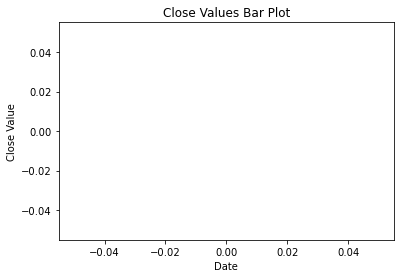

In [15]:
import tkinter as tk
import pandas as pd
import plotly.graph_objects as go
import webbrowser

# Load the data
df = pd.read_csv('predicted.csv')  # Replace 'your_data.csv' with your actual data file

def plot_candlestick():
    # Get the start and end dates from the input fields
    start_date = start_entry.get()
    end_date = end_entry.get()

    # Filter the data based on the start and end dates
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_data = df.loc[mask]

    # Create the candlestick trace
    candlestick = go.Candlestick(
        x=filtered_data['Date'],
        open=filtered_data['Open'],
        high=filtered_data['High'],
        low=filtered_data['Low'],
        close=filtered_data['Close']
    )

    # Create the layout
    layout = go.Layout(
        title='Close Values Candlestick Chart',
        xaxis=dict(
            title='Date',
            rangeslider=dict(visible=False),
            type='category'
        ),
        yaxis=dict(title='Close Value')
    )

    # Create the figure
    fig = go.Figure(data=[candlestick], layout=layout)

    # Save the HTML file
    fig.write_html('candlestick_chart.html')

    # Open the HTML file in the web browser
    webbrowser.open('candlestick_chart.html')

# Create the tkinter window
window = tk.Tk()
window.title('Close Values Candlestick Chart')

# Create the labels and entry fields
start_label = tk.Label(window, text='Start Date (YYYY-MM-DD):')
start_label.pack()
start_entry = tk.Entry(window)
start_entry.pack()

end_label = tk.Label(window, text='End Date (YYYY-MM-DD):')
end_label.pack()
end_entry = tk.Entry(window)
end_entry.pack()

# Create the button to plot the candlestick chart
plot_button = tk.Button(window, text='Plot', command=plot_candlestick)
plot_button.pack()

# Run the tkinter event loop
window.mainloop()


In [16]:
import tkinter as tk
import pandas as pd
import plotly.graph_objects as go
import webbrowser

# Load the data
df = pd.read_csv('5yr.csv')  # Replace 'your_data.csv' with your actual data file

def plot_candlestick():
    # Get the start and end dates from the input fields
    start_date = start_entry.get()
    end_date = end_entry.get()

    # Filter the data based on the start and end dates
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_data = df.loc[mask]

    # Create the candlestick trace
    candlestick = go.Candlestick(
        x=filtered_data['Date'],
        open=filtered_data['Open'],
        high=filtered_data['High'],
        low=filtered_data['Low'],
        close=filtered_data['Close'],
        increasing_line_color='green',
        decreasing_line_color='red'
    )

    # Create the layout
    layout = go.Layout(
        title='Close Values Candlestick Chart',
        xaxis=dict(
            title='Date',
            rangeslider=dict(visible=False),
            type='category'
        ),
        yaxis=dict(title='Close Value')
    )

    # Create the figure
    fig = go.Figure(data=[candlestick], layout=layout)

    # Save the HTML file
    fig.write_html('candlestick_chart.html')

    # Open the HTML file in the web browser
    webbrowser.open('candlestick_chart.html')

# Create the tkinter window
window = tk.Tk()
window.title('Close Values Candlestick Chart')

# Create the labels and entry fields
start_label = tk.Label(window, text='Start Date (YYYY-MM-DD):')
start_label.pack()
start_entry = tk.Entry(window)
start_entry.pack()

end_label = tk.Label(window, text='End Date (YYYY-MM-DD):')
end_label.pack()
end_entry = tk.Entry(window)
end_entry.pack()

# Create the button to plot the candlestick chart
plot_button = tk.Button(window, text='Plot', command=plot_candlestick)
plot_button.pack()

# Run the tkinter event loop
window.mainloop()
